### Устанавливаем библиотеки 




Задача № 3 (для 2 курса)
 
Название: Автоматизация обработки машиночитаемых документов.
 
Описание: Вам будет выдан набор данных документов из системы документооборота небольшой вымышленной компании. На основе этого набора данных вам нужно построить граф знаний о компании, который включает:

● 	Организационную структуру (список подразделений). Есть

● 	Список сотрудников 

●  и их должностей. 

● 	Должностные обязанности и полномочия сотрудников.

На основе построенного графа знаний нужно разработать систему, которая ищет ошибки в проверочных документах (10 правильных документов, 10 документов с ошибками), например:

● 	Опечатки в названиях подразделений или ФИО сотрудников.

● 	Несуществующие подразделения или сотрудники, ошибки в должностях.

● 	Несоответствие тематики документа подразделению, в которое он направлен для исполнения (в бухгалтерию направлен документ с задачей по ИТ).
 
Ссылка на набор данных – https://www.dropbox.com/sh/d5h5f3yrql8x392/AACQ2WYa5qYCqjC8QuVZ5TJ4a?dl=1 

Вам будет передана открытая часть датасета с разметкой, закрытая часть датасета без разметки и проверочные документы (20 документов для подзадачи обнаружения ошибок в документах).
 
Требования к решению:
1.   Код программы построения графа знаний о компании (ссылка на GitHub), с помощью которого можно ответить на вопросы:
a.   Количество отделов.
b.   Количество сотрудников.
c.	К какому отделу относится конкретная задача.
2.   Код программы поиска документов с ошибками на основе графа знаний (ссылка на GitHub).
3.   Документы, в которых найдены ошибки.
 
Критерии оценки:
● 	За каждый найденный документ с ошибкой начисляется 10 баллов.
● 	За каждый документ, представленный как ошибочный, но в котором ошибки на самом деле нет, назначается штраф -1 балл.
 
Советы по реализации:
1.   Извлечь именованные сущности (NER) из текста можно с помощью библиотеки spacy (https://spacy.io/), pullenti, natasha или соответствующих моделей с huggingface (https://huggingface.co/).
2.   Для сущностей, для которых не удастся найти типовые предобученные модели (например, сущность «Задача» или «Департамент») организовать обучение модели с использованием открытой части датасета.
3.   Для построения графа связей в организации рекомендуется использовать библиотеку NetworkX - https://networkx.org/



In [120]:
#!pip install networkx
#!pip install --upgrade networkx
#!pip install pygraphviz pydot lxml
#!pip install pygraphviz
#!pytest networkx
#!pytest --pyargs networkx
#! pip install pymorphy2
#! pip install -U pip setuptools wheel
#! pip install -U spacy 
#! python -m spacy download en_core_web_sm
#! python -m spacy download ru_core_news_sm
#! pip install --user -U nltk
#! pip install -U liblinear-official
#! pip install natasha
#! pip install ipymarkup
#! pip install transformers sentencepiece sacremoses
#!pip install pymorphy2[fast]
#!pip install natasha spacy==3.3

#!python -m spacy download ru_core_news_sm
#!pip install tensorflow-text spacy==3.3
#!python -m spacy download ru_core_news_sm
#!pip install pymorphy2[fast] 


In [142]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from yargy.tokenizer import MorphTokenizer
from yargy import rule, or_, Parser
from yargy.predicates import eq, type as _t, normalized, gram
from ipymarkup import show_span_box_markup, show_span_line_markup
from yargy.pipelines import morph_pipeline as mp, caseless_pipeline as cp
from yargy.interpretation import fact
from IPython.display import display

from transformers import pipeline, AutoTokenizer, AutoConfig, AutoModelForTokenClassification

# Морфологический анализ
import pymorphy2

# Синтаксический анализ
import spacy
from spacy import displacy

import pandas as pd
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import io
import re
import string
import tqdm

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
import gensim.models


import requests
import nltk
import spacy
import tensorflow as tf
import tensorflow_text as tf_text
from nltk.tokenize import sent_tokenize, word_tokenize

import pymorphy2

import spacy
from spacy import displacy

In [5]:
with open('merged_data.json', "r") as readFile:
            merge_data = json.load(readFile)

In [6]:
text = []
for n in range(10):
    a = merge_data[n]['Tasks']['Task1']['task_responsibles_people']
    text.append(a)

text

['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.',
 'Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича',
 'Контроль над исполнением распоряжения оставить за тимлидами проектной команды Абаимовым Симоном',
 'Контроль над выполнением настоящего распоряжения оставляю за собой',
 'Контроль над выполнением настоящего распоряжения оставляю за собой',
 'Контроль над выполнением приказа возложить на руководителя отдела проектирования Департамента разработки Шихова Р.П.',
 'Обеспечение выполнения возложить на специалиста второй категории бухгалтерии Смирнову О.А.',
 'За контроль и выполнение назначить ответственным специалиста третьей категории отдела разработки систем Андреева С.Е.',
 'За контроль над исполнением распоряжения назначить ответственным специалиста второй категории отдела разработки пользовательских интерфейсов Попова А.А.',
 '

### Определяем количество департаментов в компании

In [7]:
departments = []
for n in range(10000):
    departments.append(merge_data[n]['Tasks']['Task1']['task_responsibles_groups'])



In [8]:
FIO = []
for n in range(10000):
    FIO.append(merge_data[n]['Tasks']['Task1']['task_responsibles_people'])

In [9]:
FIO[:5]

['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.',
 'Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича',
 'Контроль над исполнением распоряжения оставить за тимлидами проектной команды Абаимовым Симоном',
 'Контроль над выполнением настоящего распоряжения оставляю за собой',
 'Контроль над выполнением настоящего распоряжения оставляю за собой']

In [11]:
POSITION = []
for n in range(10000):
    try:
        for i in range(10):
            POSITION.append(merge_data[n]['Tasks']['Global_supervisor'])
    except KeyError:
            continue

In [116]:
text = POSITION

### Очищаем данные

In [62]:
def text_split(text: str):
    pouch_of_words = []
    for line in text:
        line = " ".join(line)
        line = line.split()
        pouch_of_words.append(line)
    return pouch_of_words

In [98]:
text = """
Илья Сегалович родился в семье советского геофизика В.И.Сегаловича. Детство провёл в 
Казахстане. В Республиканской физико-математической школе познакомился с будущим сооснователем 
«Яндекса» Аркадием Воложем. В 1981 году поступил в Московский геологоразведочный институт 
им.Орджоникидзе.

С самого основания «Яндекса» и до своей смерти Илья Сегалович занимал позицию директора по 
технологиям, был ключевым архитектором поисковых технологий и инициатором многих продуктов 
компании, например, Яндекс.Директа, голосового помощника «Алиса» и беспилотного автомобиля.
"""

In [124]:
def token_words_split(text: str):
    pouch_of_words = []
    if type(text) == list:
        for line in text:
            line = " ".join(line)
            TOKENIZER = word_tokenize(line)
            pouch_of_words.append(TOKENIZER)
    return pouch_of_words

pouch_of_words = token_words_split(POSITION)

In [101]:
#def token_tf_text_split(text: str):
#    pouch_of_words = []
#    if type(text) == list:
#        for line in text:
#            line = " ".join(line) 
#            sp_model = line
#            tokenizer = tf_text.SentencepieceTokenizer(sp_model, out_type=tf.string)
#            tokens = tokenizer.tokenize([line])
#            pouch_of_words.append([token.decode('utf-8') for token in tokens.to_list()[0]])
#    return pouch_of_words

#token_tf_text_split(POSITION[:10])

In [112]:
text = POSITION[:2]

def split_spacy(text: str):
    pouch_of_words = []
    nlp = spacy.load('ru_core_news_sm')
    if type(text) == list:
        for line in text:
            line = " ".join(line)
            doc = nlp(line)
            for token in doc:
                pouch_of_words.append(token)
    return pouch_of_words


In [69]:
def sentence(text: str):
    nltk.download('punkt')
    sentences = sent_tokenize(text)
    return sentences


In [114]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '..', '...',' ','"',"'",'`','``','"""',"''",'i','ii','iii','[',']']

/Users/macbook/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/IPython/core/inputtransformer2.py:595: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


### Морфологический анализ

In [122]:
morph = pymorphy2.MorphAnalyzer()

In [137]:
def morph_word(words: str):
    words = split_spacy(words)
    morph_words = []
    for word in words:
        try:
            for n in range(len(pouch_of_words[0])):
                           morph_words.append(morph.parse(pouch_of_words[n][n]))
        except KeyError:
                       continue
    return morph_words


### Синтаксический анализ

In [138]:
nlp_synt = spacy.load('ru_core_news_sm')

### Разделяем текст на предложения.

In [145]:
text = POSITION[:5]
text

[['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.'],
 ['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.'],
 ['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.'],
 ['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.'],
 ['Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.']]

In [154]:
def sentence(text: str):
    pouch_of_sentence = []
    if type(text) == list:
        for line in text:
            line = " ".join(line)
            nltk.download('punkt')
            sentences = sent_tokenize(line)
            pouch_of_sentence.append(sentences)
    return str(pouch_of_sentence)
    
text = sentence(POSITION[10:12])

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [155]:
text

"[['Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича Контроль над выполнением приказа возложить на системного администратора Сергеева Андрея Контроль над исполнением распоряжения оставить за специалистом третьей категории Службы ИТ Кимом Юрием Ивановичем'], ['Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича Контроль над выполнением приказа возложить на системного администратора Сергеева Андрея Контроль над исполнением распоряжения оставить за специалистом третьей категории Службы ИТ Кимом Юрием Ивановичем']]"

In [156]:
doc = nlp_synt(text)

In [157]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

[ PUNCT punct
[ PUNCT punct
' PUNCT punct
Ответственность NOUN ROOT
за ADP case
исполнение NOUN nmod
распоряжения NOUN nmod
возложить VERB nmod
на ADP case
специалиста NOUN obl
третьей ADJ amod
категории NOUN nmod
Службы PROPN nmod
ИТ PROPN nmod
Кима PROPN appos
Юрия PROPN flat:name
Ивановича PROPN flat:name
Контроль NOUN obj
над ADP case
выполнением NOUN nmod
приказа NOUN nmod
возложить VERB nmod
на ADP case
системного ADJ amod
администратора NOUN obl
Сергеева PROPN appos
Андрея PROPN flat:name
Контроль PROPN flat:name
над ADP case
исполнением NOUN obl
распоряжения NOUN nmod
оставить VERB nmod
за ADP case
специалистом NOUN obl
третьей ADJ amod
категории NOUN nmod
Службы PROPN nmod
ИТ PROPN nmod
Кимом PROPN appos
Юрием PROPN flat:name
Ивановичем PROPN flat:name
' PUNCT punct
] PUNCT punct
, PUNCT punct
[ PUNCT punct
' PUNCT punct
Ответственность NOUN parataxis
за ADP case
исполнение NOUN nmod
распоряжения NOUN nmod
возложить VERB nmod
на ADP case
специалиста NOUN obl
третьей ADJ amod
к

In [158]:
displacy.render(doc, style="dep", jupyter=True)

In [159]:
### Использование библиоетки natasha

In [162]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    LOC,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,
 
    Doc
)


In [163]:
 
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

In [164]:
syntax_parser = NewsSyntaxParser(emb)


In [166]:
text

"[['Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича Контроль над выполнением приказа возложить на системного администратора Сергеева Андрея Контроль над исполнением распоряжения оставить за специалистом третьей категории Службы ИТ Кимом Юрием Ивановичем'], ['Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича Контроль над выполнением приказа возложить на системного администратора Сергеева Андрея Контроль над исполнением распоряжения оставить за специалистом третьей категории Службы ИТ Кимом Юрием Ивановичем']]"

In [167]:
doc_n = Doc(text)

In [168]:
doc_n.segment(segmenter)


In [171]:
for tocken in doc_n.tokens:
    print(tocken)

In [172]:
doc_n.parse_syntax(syntax_parser)

In [175]:
for tocken in doc_n.tokens:
    print(tocken)

In [178]:
doc_n.sents[0].syntax.print()

                                                                                            ┌────► [               punct
                                                                                            │ ┌──► [               punct
                                                                                            │ │ ┌► '               punct
┌─┌─┌─────────────────────────────────────────────────────┌───────────┌─────────┌─┌─────────└─└─└─ Ответственность 
│ │ │                                                   ┌►│           │         │ │                за              case
│ │ │                                                 ┌─│ │           │     ┌──►│ │             ┌─ исполнение      nmod
│ │ │           ┌─────────────────────────────────────│ │ │           │     │   │ │     ┌───────└► распоряжения    nmod
│ │ │           │                                     │ │ │         ┌►│     │   │ │     │          возложить       nmod
│ │ │           │                        

### Выявление ФИО

In [183]:
FIO = []

for tocken in doc_n.tokens:
    if tocken.rel == 'flat:name' or tocken.rel == 'appos':
        if tocken.rel == 'appos':
            surn = tocken.text 
            if surn in FIO:
                pass
            else:
                FIO.append(surn)
        elif tocken.rel == 'flat:name':
            IO = tocken.text + '.'      
            FIO.append(IO)
           
FIO

['Кима',
 'Юрия.',
 'Ивановича.',
 'Андрея',
 'Контроль.',
 'Кимом',
 'Юрием.',
 'Ивановичем.',
 'Юрия.',
 'Ивановича.',
 'Контроль.',
 'Юрием.',
 'Ивановичем.']

In [186]:
doc_n.segment(segmenter) 
doc_n.tag_morph(morph_tagger)
doc_n.parse_syntax(syntax_parser)
doc_n.tag_ner(ner_tagger)

In [189]:
display(doc_n.tokens[:5])

[DocToken(stop=1, text='[', id='1_1', head_id='1_4', rel='punct', pos='PUNCT'),
 DocToken(start=1, stop=2, text='[', id='1_2', head_id='1_4', rel='punct', pos='PUNCT'),
 DocToken(start=2, stop=3, text="'", id='1_3', head_id='1_4', rel='punct', pos='PUNCT'),
 DocToken(start=3, stop=18, text='Ответственность', id='1_4', head_id='1_4', rel='nsubj', pos='NOUN', feats=<Inan,Acc,Fem,Sing>),
 DocToken(start=19, stop=21, text='за', id='1_5', head_id='1_49', rel='case', pos='ADP')]

In [190]:
display(doc_n.sents)

[DocSent(stop=646, text="[['Ответственность за исполнение распоряжения воз..., tokens=[...], spans=[...])]

In [193]:
doc_n.tag_morph(morph_tagger)
display(doc_n.tokens)

[DocToken(stop=1, text='[', id='1_1', head_id='1_4', rel='punct', pos='PUNCT'),
 DocToken(start=1, stop=2, text='[', id='1_2', head_id='1_4', rel='punct', pos='PUNCT'),
 DocToken(start=2, stop=3, text="'", id='1_3', head_id='1_4', rel='punct', pos='PUNCT'),
 DocToken(start=3, stop=18, text='Ответственность', id='1_4', head_id='1_4', rel='nsubj', pos='NOUN', feats=<Inan,Acc,Fem,Sing>),
 DocToken(start=19, stop=21, text='за', id='1_5', head_id='1_49', rel='case', pos='ADP'),
 DocToken(start=22, stop=32, text='исполнение', id='1_6', head_id='1_47', rel='nmod', pos='NOUN', feats=<Inan,Acc,Neut,Sing>),
 DocToken(start=33, stop=45, text='распоряжения', id='1_7', head_id='1_6', rel='nmod', pos='NOUN', feats=<Inan,Gen,Neut,Sing>),
 DocToken(start=46, stop=55, text='возложить', id='1_8', head_id='1_50', rel='nmod', pos='VERB', feats=<Perf,Inf,Act>),
 DocToken(start=56, stop=58, text='на', id='1_9', head_id='1_53', rel='case', pos='ADP'),
 DocToken(start=59, stop=70, text='специалиста', id='1_10

In [194]:
for span in doc_n.spans:
    span.normalize(morph_vocab)

{_.text: _.normal for _ in doc_n.spans if _.text != _.normal}

{'Сергеева': 'Сергеев',
 'Андрея Контроль': 'Андрей Контроль',
 'Службы ИТ': 'Служба ИТ',
 'Кимом Юрием Ивановичем': 'Ким Юрий Иванович'}

In [196]:
for token in doc_n.tokens:
    token.lemmatize(morph_vocab)
    
{_.text: _.lemma for _ in doc_n.tokens}

{'[': '[',
 "'": "'",
 'Ответственность': 'ответственность',
 'за': 'за',
 'исполнение': 'исполнение',
 'распоряжения': 'распоряжение',
 'возложить': 'возложить',
 'на': 'на',
 'специалиста': 'специалист',
 'третьей': 'третий',
 'категории': 'категория',
 'Службы': 'служба',
 'ИТ': 'ит',
 'Кима': 'ким',
 'Юрия': 'юрий',
 'Ивановича': 'иванович',
 'Контроль': 'контроль',
 'над': 'над',
 'выполнением': 'выполнение',
 'приказа': 'приказ',
 'системного': 'системный',
 'администратора': 'администратор',
 'Сергеева': 'сергеев',
 'Андрея': 'андрей',
 'исполнением': 'исполнение',
 'оставить': 'оставить',
 'специалистом': 'специалист',
 'Кимом': 'ким',
 'Юрием': 'юрий',
 'Ивановичем': 'иванович',
 ']': ']',
 ',': ','}

### Находим уникальные значения департаментов.

In [41]:
departments_set = set(departments)
departments_Unique_list = list(departments_set)
departments_Unique_list

['Служба ИТ',
 'Административно-хозяйственный отдел',
 'Отдел эксплуатации',
 'Отдел разработки систем',
 'Отдел проектирования',
 'Отдел тестирования',
 'Отдел архитектуры',
 'Бухгалтерия']

### Строим однонаправленный граф.

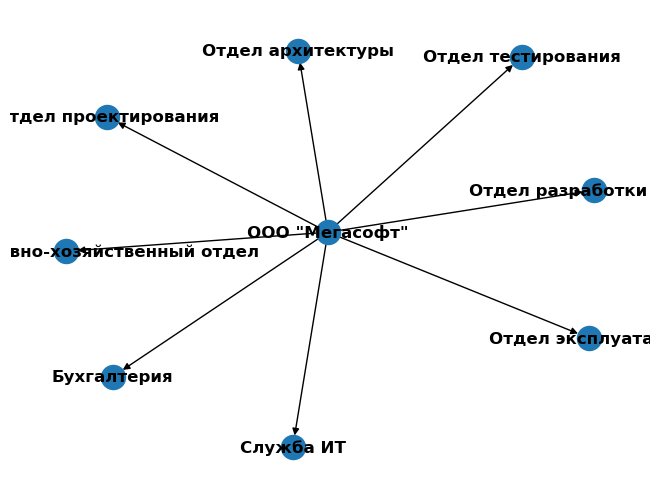

In [5]:
DG = nx.DiGraph()

DG.add_edge('ООО "Мегасофт"', departments_Unique_list[0]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[1]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[2]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[3]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[4]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[5]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[6]) 
DG.add_edge('ООО "Мегасофт"', departments_Unique_list[7]) 

nx.draw(DG, with_labels=True, font_weight='bold')